### Local outlier factor 

A Local Outlier Factor (LOF) detects anomalies based on how isolated a data point is relative to its local neighborhood. Like an isolation forest, the model assigns an LOF Score (+1 for normal, -1 for anomalies).

The scatter plot again shows blue points as normal data, and red points as detected anomalies. One can see that the results are almost identical to those of the isolation forest!

That being said, they do go about identifying outliers in distinct ways: Isolation Forest isolates rare observations quickly by partitioning the data. LOF, on the other hand, compares a point’s density to its neighbors and flags areas where density is lower than expected.


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
n_samples = 200
data = pd.DataFrame({
    "Feature_1": np.random.normal(50, 10, n_samples),
    "Feature_2": np.random.normal(30, 5, n_samples)
})
# Add anomalies
data.loc[np.random.choice(n_samples, 5), "Feature_1"] *= 4
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

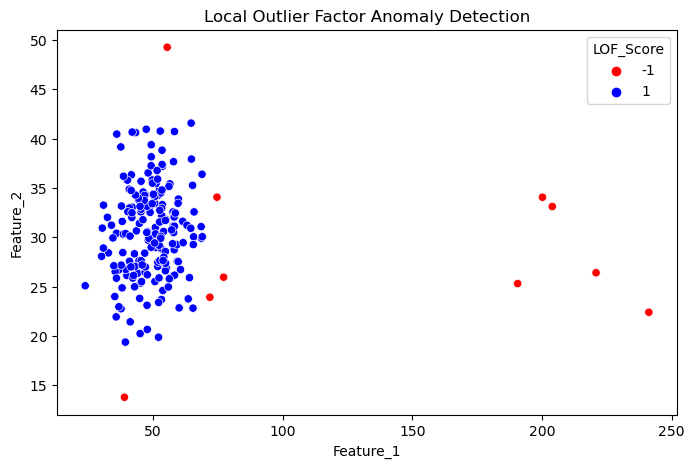

In [4]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data["LOF_Score"] = lof.fit_predict(data_scaled)
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="Feature_1", y="Feature_2", hue="LOF_Score", palette={1: "blue", -1: "red"})
plt.title("Local Outlier Factor Anomaly Detection")
plt.show()